This dataset contains detailed information on car sales, covering multiple manufacturers and models. It is suitable for data analysis, price prediction, market trend analysis, machine learning, and exploratory data analysis (EDA).
The dataset includes information about manufacturers, car models, engine specifications, fuel type, year of manufacture, mileage, and final sale price.

Researchers, data scientists, and machine learning practitioners can use this dataset for:

Price prediction models (e.g., regression, XGBoost, deep learning)
Car valuation analysis for resale markets
Market trend analysis across manufacturers and fuel types
Data visualization projects

In [29]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#creating dataset
df=pd.read_csv('car_sales_data.csv')

In [31]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [32]:
df['Fuel type'].value_counts()

Fuel type
Petrol    25488
Diesel    13268
Hybrid    11244
Name: count, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [34]:
df['car_age']=2025-df['Year of manufacture']
df.drop("Year of manufacture",axis=1,inplace=True)

In [35]:
#checking null value
df.isnull().sum()

Manufacturer    0
Model           0
Engine size     0
Fuel type       0
Mileage         0
Price           0
car_age         0
dtype: int64

In [36]:
#for fuel ,model, manufacture are object string , so using label nd onehot encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()
fuel_encoded = label.fit_transform(df['Fuel type'])

fuel_df = pd.DataFrame(fuel_encoded, columns=['Fuel Type'], index=df.index)

# Concatenate with original DataFrame (excluding original column)
df = pd.concat([df.drop('Fuel type', axis=1), fuel_df], axis=1)




In [37]:
df.head()

,Manufacturer,Model,Engine size,Mileage,Price,car_age,Fuel Type
0,Ford,Fiesta,1.0,127300,3074,23,2
1,Porsche,718 Cayman,4.0,57850,49704,9,2
2,Ford,Mondeo,1.6,39190,24072,11,0
3,Toyota,RAV4,1.8,210814,1705,37,1
4,VW,Polo,1.0,127869,4101,19,2


In [38]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder1 = OneHotEncoder()
label_encoder2 = LabelEncoder()
encoded1=onehot_encoder1.fit_transform(df[['Manufacturer']])
df_encoded1=pd.DataFrame(encoded1.toarray(),columns=onehot_encoder1.get_feature_names_out(['Manufacturer']),index=df.index)
df=pd.concat([df,df_encoded1],axis=1)


# Apply label encoding
df['Model_encoded'] = label_encoder2.fit_transform(df['Model'])

# Drop original columns
df = df.drop(['Manufacturer', 'Model'], axis=1)



In [39]:
df.head()

,Engine size,Mileage,Price,car_age,Fuel Type,Manufacturer_BMW,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW,Model_encoded
0,1.0,127300,3074,23,2,0.0,1.0,0.0,0.0,0.0,3
1,4.0,57850,49704,9,2,0.0,0.0,1.0,0.0,0.0,0
2,1.6,39190,24072,11,0,0.0,1.0,0.0,0.0,0.0,7
3,1.8,210814,1705,37,1,0.0,0.0,0.0,1.0,0.0,11
4,1.0,127869,4101,19,2,0.0,0.0,0.0,0.0,1.0,9


<Axes: >

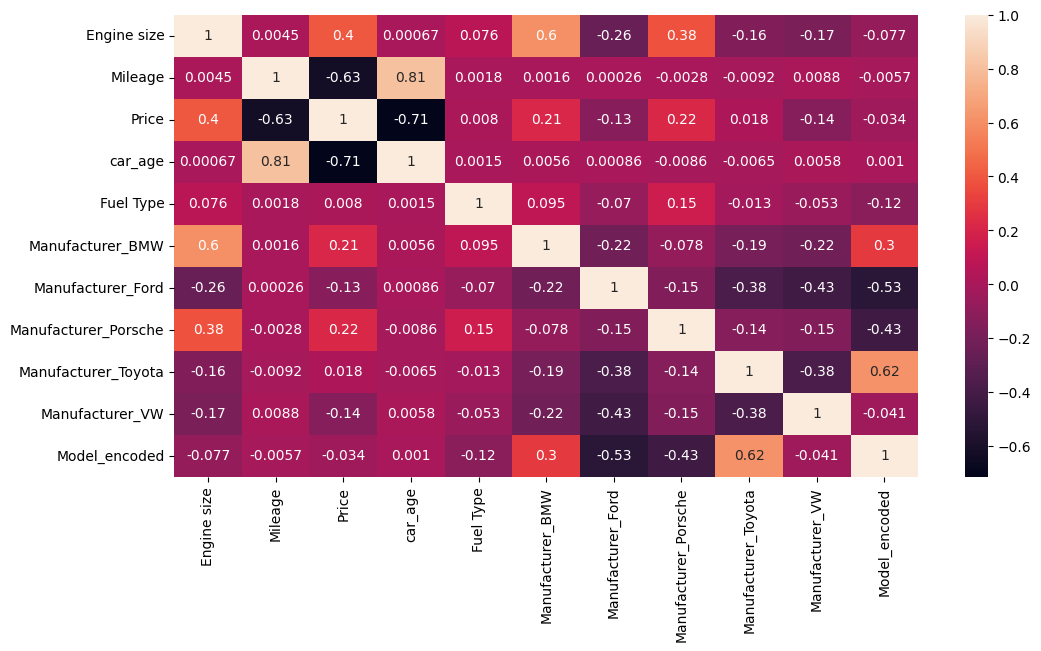

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

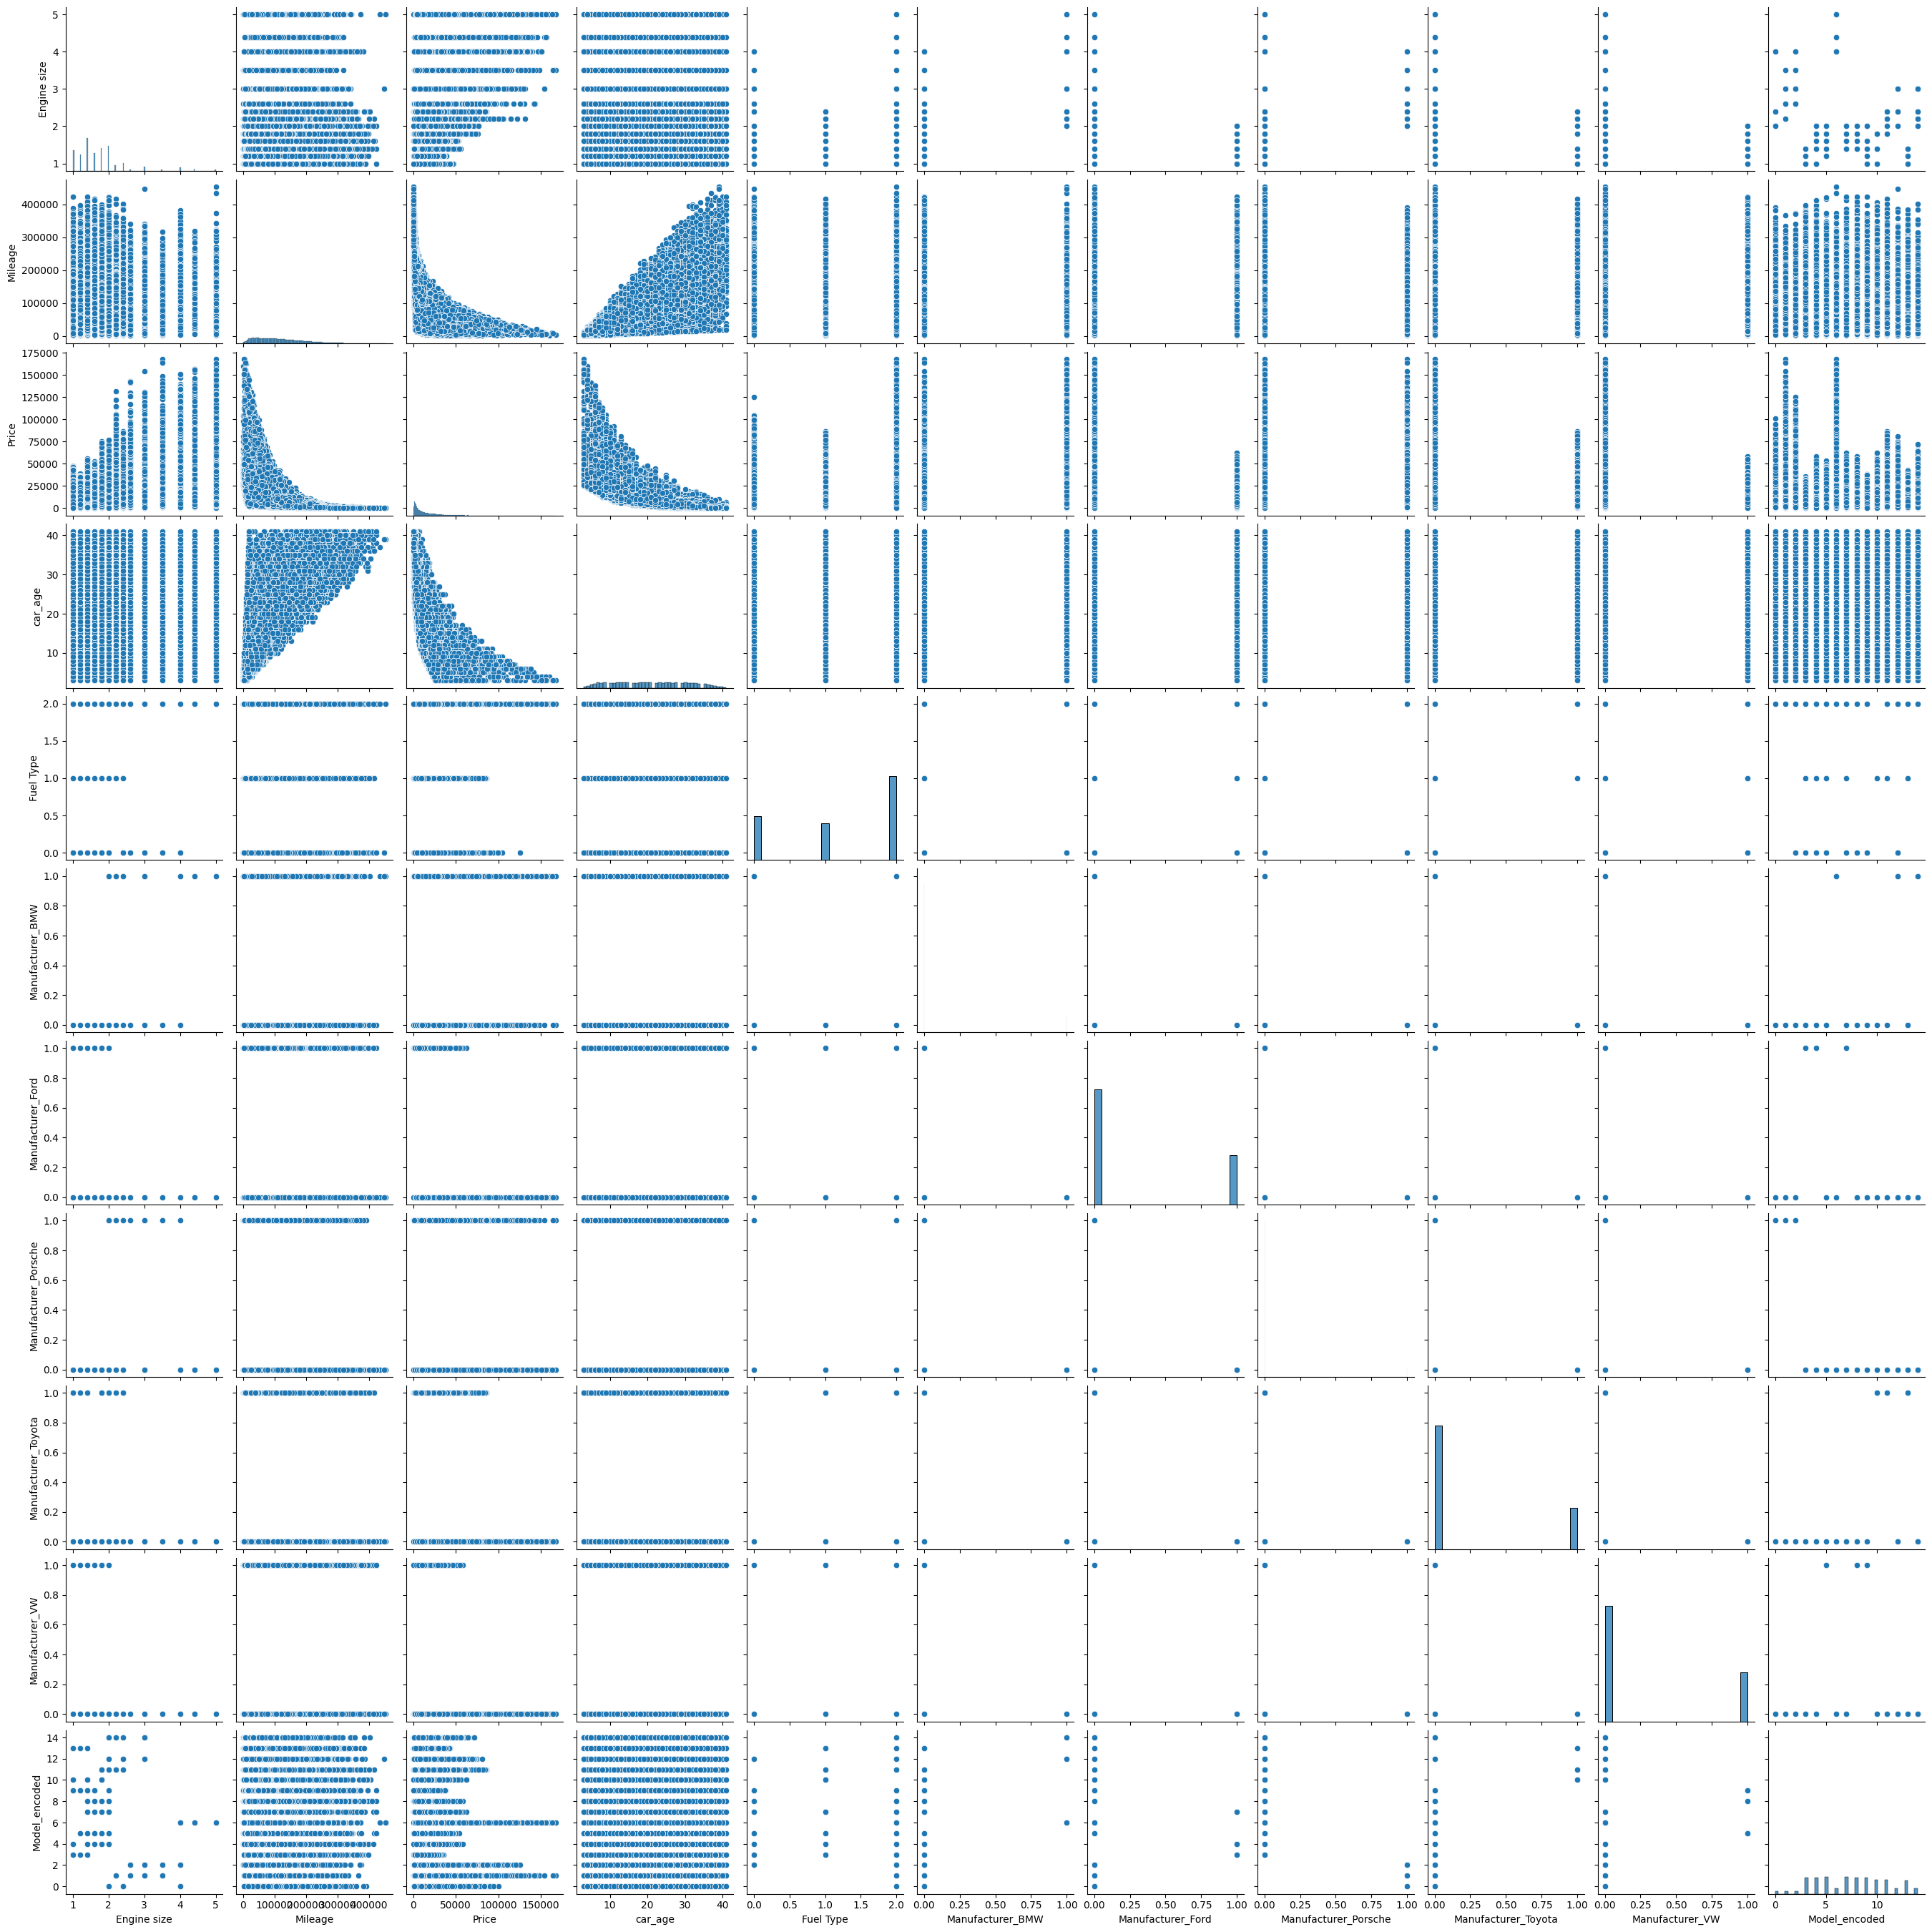

In [41]:
sns.pairplot(df)

In [42]:
#dependent and independent variable
X=df.drop('Price',axis=1)
y=df['Price']

In [43]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [44]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "SVR":SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 9055.1101
- Mean Absolute Error: 5928.9024
- R2 Score: 0.6961
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9140.6837
- Mean Absolute Error: 5914.5942
- R2 Score: 0.6890




c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.275e+09, tolerance: 1.012e+09
  model = cd_fast.enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 9055.1114
- Mean Absolute Error: 5928.5009
- R2 Score: 0.6961
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9140.7339
- Mean Absolute Error: 5914.1897
- R2 Score: 0.6890


Ridge
Model performance for Training set
- Root Mean Squared Error: 9055.1101
- Mean Absolute Error: 5928.8375
- R2 Score: 0.6961
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9140.6861
- Mean Absolute Error: 5914.5314
- R2 Score: 0.6890


SVR
Model performance for Training set
- Root Mean Squared Error: 16278.3822
- Mean Absolute Error: 8686.4622
- R2 Score: 0.0178
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 16201.3405
- Mean Absolute Error: 8585.5258
- R2 Score: 0.0228


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 602.2372
- Mean Absolute Error: 251.4212
- R2 Score: 0.

In [48]:
#hyper perameter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
ada_params={
    "n_estimators":[50,60,70,80],
    "loss":['linear','square','exponential']
}
gradient_params={"loss": ['squared_error','huber','absolute_error'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10],
            }

dt_params={'criterion':['squared_error','absolute_error','friedman_mse'],
        'splitter':['best','random'],
        'max_depth':[1,2,3,4,5,10,15,20,25],
       'max_features':['sqrt','log2','auto'],    
}
svr_param = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}



In [49]:
randomcv_models = [("DT",DecisionTreeRegressor(),dt_params),
                   ("RF", RandomForestRegressor(), rf_params),
                   ("AdaBoostRegressor",AdaBoostRegressor(),ada_params),
                   ("GradientBoost",GradientBoostingRegressor(),gradient_params),
                   ('knn',KNeighborsRegressor(),knn_params),
                   ('svr',SVR(),svr_param)
                   ]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=50,
                                   cv=3,
                                   verbose=2,
                                   )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END criterion=friedman_mse, max_depth=25, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=25, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=25, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_features=log2, splitter=random; total time=   2.3s
[CV] END criterion=absolute_error, max_depth=2, max_features=log2, splitter=random; total time=   2.7s
[CV] END criterion=absolute_error, max_depth=2, max_features=log2, splitter=random; total time=   2.3s
[CV] END criterio